In [1]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
import seaborn as sns
import os

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Foreign_Exchange_Rates.csv')

In [5]:
df['TimeSeries'] = pd.to_datetime(df.iloc[:, [1]].stack()).unstack()

In [6]:
df = df.drop(columns=['Unnamed: 0', 'Time Serie',])

In [7]:
df = df.set_index('TimeSeries')

In [8]:
df = df.apply(pd.to_numeric, errors='coerce').dropna()

In [9]:
df.describe().T.sort_values(by=['min', 'max'])

,count,mean,std,min,25%,50%,75%,max
UNITED KINGDOM - UNITED KINGDOM POUND/US$,5015.0,0.640466,0.082562,0.4738,0.58750,0.6365,0.69240,0.8287
EURO AREA - EURO/US$,5015.0,0.844014,0.126826,0.6246,0.75100,0.8156,0.90015,1.2092
SWITZERLAND - FRANC/US$,5015.0,1.150475,0.249145,0.7296,0.96680,1.0403,1.26915,1.8250
AUSTRALIA - AUSTRALIAN DOLLAR/US$,5015.0,1.332160,0.269974,0.9069,1.11520,1.3113,1.43040,2.0713
CANADA - CANADIAN DOLLAR/US$,5015.0,1.230503,0.182136,0.9168,1.05585,1.2371,1.33570,1.6128
NEW ZEALAND - NEW ZELAND DOLLAR/US$,5015.0,1.543820,0.337414,1.1346,1.32380,1.4426,1.59120,2.5510
SINGAPORE - SINGAPORE DOLLAR/US$,5015.0,1.480412,0.189003,1.2007,1.34290,1.4084,1.67935,1.8540
BRAZIL - REAL/US$,5015.0,2.548483,0.724234,1.5375,1.94565,2.3291,3.13000,4.2594
MALAYSIA - RINGGIT/US$,5015.0,3.651129,0.378635,2.9370,3.29050,3.8000,3.80000,4.4960
DENMARK - DANISH KRONE/US$,5015.0,6.286814,0.943430,4.6605,5.59355,6.0725,6.71485,9.0050


In [10]:
def get_pearson(df):
    list_columns_name = df.columns.to_list()
    corr = pd.DataFrame()
    for val1 in list_columns_name:
        for val2 in list_columns_name:
            corr.loc[val1, val2] = stats.pearsonr(df[val1], df[val2])[0]
    return corr

In [11]:
def z_transform(df):
    list_columns_name = df.columns.to_list()
    for col in list_columns_name:
        df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)
    return df

In [12]:
def draw_plot(df, values, label=''):
    df_z = z_transform(df)
    fig, ax = plt.subplots(figsize=(20,10), linewidth=7, edgecolor='.5')
    for value in values:
        ax.plot(df_z[value], label=value)
    text_kwargs=dict(fontsize=20)
    ax.set_title(label, **text_kwargs)
    ax.legend()

In [13]:
df2019 = df.loc['2019']
corr = get_pearson(df2019)
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
AUSTRALIA - AUSTRALIAN DOLLAR/US$,1,0.852178,0.918601,0.615721,0.811582,-0.103083,0.914593,-0.187738,0.427667,0.881086,0.58131,0.852064,0.774262,0.850164,-0.681593,0.841933,0.866563,0.876048,0.32587,-0.352145,0.141386,-0.701447
EURO AREA - EURO/US$,0.852178,1,0.852329,0.435539,0.859885,-0.0585536,0.79223,-0.160476,0.397182,0.738591,0.436695,0.720368,0.63957,0.99832,-0.387174,0.674402,0.858232,0.892258,0.28497,-0.0712942,-0.0638098,-0.645614
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0.918601,0.852329,1,0.577243,0.824698,-0.0675071,0.901741,-0.0650218,0.476843,0.790288,0.524546,0.812395,0.752694,0.852387,-0.611616,0.875267,0.861635,0.878142,0.367622,-0.210777,0.102881,-0.635674
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0.615721,0.435539,0.577243,1,0.206437,-0.116862,0.613957,-0.0548976,0.110225,0.719428,0.570892,0.529823,0.830135,0.415569,-0.802258,0.604153,0.303838,0.518339,-0.0288166,-0.416515,0.632161,-0.312285
BRAZIL - REAL/US$,0.811582,0.859885,0.824698,0.206437,1,0.0419229,0.775331,-0.12177,0.527844,0.661073,0.420461,0.739058,0.532224,0.864296,-0.336416,0.721293,0.865901,0.77578,0.391257,-0.119526,-0.17872,-0.607396
CANADA - CANADIAN DOLLAR/US$,-0.103083,-0.0585536,-0.0675071,-0.116862,0.0419229,1,-0.301318,0.572445,-0.161129,-0.0513851,0.165917,0.152315,0.203129,-0.0684389,0.342906,0.0408722,-0.173271,-0.00517446,-0.284981,0.604278,0.364911,0.676513
CHINA - YUAN/US$,0.914593,0.79223,0.901741,0.613957,0.775331,-0.301318,1,-0.276239,0.549052,0.808343,0.572907,0.751436,0.709663,0.793286,-0.783159,0.841921,0.865815,0.762387,0.511009,-0.51834,0.0288638,-0.801665
HONG KONG - HONG KONG DOLLAR/US$,-0.187738,-0.160476,-0.0650218,-0.0548976,-0.12177,0.572445,-0.276239,1,0.0640514,-0.16781,0.25447,0.108021,0.205548,-0.177731,0.253161,-0.0712277,-0.136236,0.0106256,-0.125166,0.521314,0.374614,0.57085
INDIA - INDIAN RUPEE/US$,0.427667,0.397182,0.476843,0.110225,0.527844,-0.161129,0.549052,0.0640514,1,0.192592,0.456044,0.340296,0.329368,0.394009,-0.344657,0.364986,0.630574,0.324292,0.693429,-0.239983,-0.295031,-0.494853
KOREA - WON/US$,0.881086,0.738591,0.790288,0.719428,0.661073,-0.0513851,0.808343,-0.16781,0.192592,1,0.498645,0.762049,0.834877,0.731252,-0.708014,0.855354,0.640973,0.824213,0.00995084,-0.310519,0.420531,-0.531745


In [14]:
corr.sort_values(by=['CHINA - YUAN/US$']).style.background_gradient(cmap=cm)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
THAILAND - BAHT/US$,-0.701447,-0.645614,-0.635674,-0.312285,-0.607396,0.676513,-0.801665,0.57085,-0.494853,-0.531745,-0.257673,-0.450742,-0.253442,-0.656607,0.596965,-0.493935,-0.760417,-0.5668,-0.485921,0.59959,0.357691,1
JAPAN - YEN/US$,-0.681593,-0.387174,-0.611616,-0.802258,-0.336416,0.342906,-0.783159,0.253161,-0.344657,-0.708014,-0.592688,-0.556258,-0.670769,-0.379545,1,-0.670946,-0.477889,-0.448534,-0.28868,0.742796,-0.351388,0.596965
SWITZERLAND - FRANC/US$,-0.352145,-0.0712942,-0.210777,-0.416515,-0.119526,0.604278,-0.51834,0.521314,-0.239983,-0.310519,-0.273938,-0.236311,-0.167914,-0.0737457,0.742796,-0.235658,-0.261864,-0.0138661,-0.352647,1,0.0500808,0.59959
CANADA - CANADIAN DOLLAR/US$,-0.103083,-0.0585536,-0.0675071,-0.116862,0.0419229,1,-0.301318,0.572445,-0.161129,-0.0513851,0.165917,0.152315,0.203129,-0.0684389,0.342906,0.0408722,-0.173271,-0.00517446,-0.284981,0.604278,0.364911,0.676513
HONG KONG - HONG KONG DOLLAR/US$,-0.187738,-0.160476,-0.0650218,-0.0548976,-0.12177,0.572445,-0.276239,1,0.0640514,-0.16781,0.25447,0.108021,0.205548,-0.177731,0.253161,-0.0712277,-0.136236,0.0106256,-0.125166,0.521314,0.374614,0.57085
TAIWAN - NEW TAIWAN DOLLAR/US$,0.141386,-0.0638098,0.102881,0.632161,-0.17872,0.364911,0.0288638,0.374614,-0.295031,0.420531,0.374523,0.257556,0.608077,-0.0903428,-0.351388,0.307639,-0.250427,0.173433,-0.490674,0.0500808,1,0.357691
SRI LANKA - SRI LANKAN RUPEE/US$,0.32587,0.28497,0.367622,-0.0288166,0.391257,-0.284981,0.511009,-0.125166,0.693429,0.00995084,0.312943,0.232919,0.090988,0.293552,-0.28868,0.23663,0.573184,0.122598,1,-0.352647,-0.490674,-0.485921
INDIA - INDIAN RUPEE/US$,0.427667,0.397182,0.476843,0.110225,0.527844,-0.161129,0.549052,0.0640514,1,0.192592,0.456044,0.340296,0.329368,0.394009,-0.344657,0.364986,0.630574,0.324292,0.693429,-0.239983,-0.295031,-0.494853
MEXICO - MEXICAN PESO/US$,0.58131,0.436695,0.524546,0.570892,0.420461,0.165917,0.572907,0.25447,0.456044,0.498645,1,0.687757,0.70626,0.418104,-0.592688,0.493911,0.491342,0.466772,0.312943,-0.273938,0.374523,-0.257673
UNITED KINGDOM - UNITED KINGDOM POUND/US$,0.615721,0.435539,0.577243,1,0.206437,-0.116862,0.613957,-0.0548976,0.110225,0.719428,0.570892,0.529823,0.830135,0.415569,-0.802258,0.604153,0.303838,0.518339,-0.0288166,-0.416515,0.632161,-0.312285


C:\Anaconda_3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


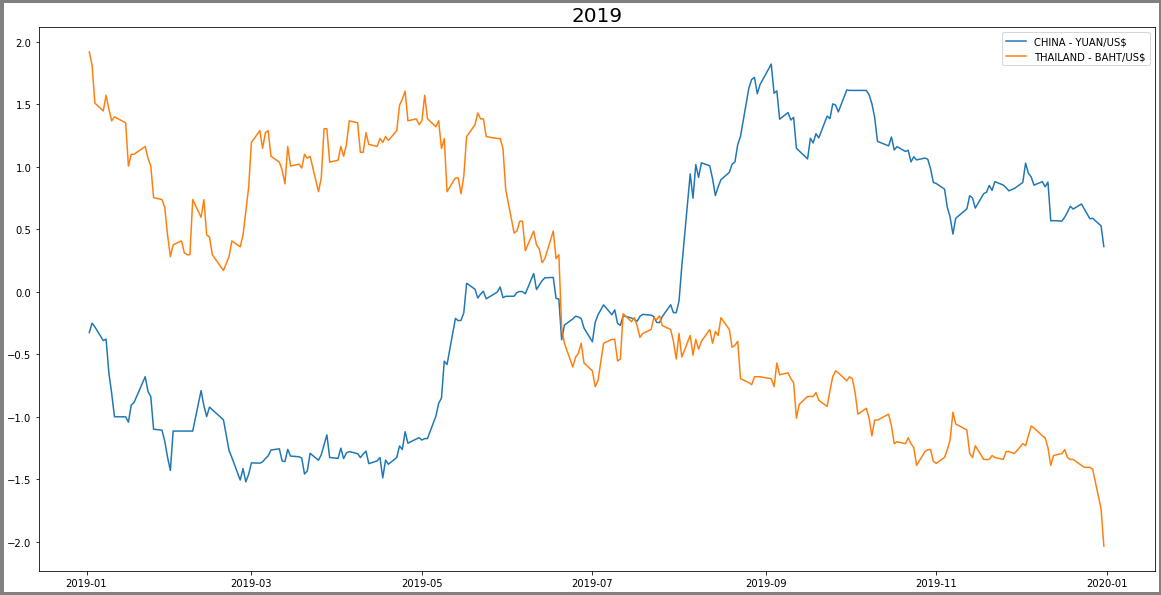

In [15]:
draw_plot(df2019, ['CHINA - YUAN/US$', 'THAILAND - BAHT/US$'], 2019)

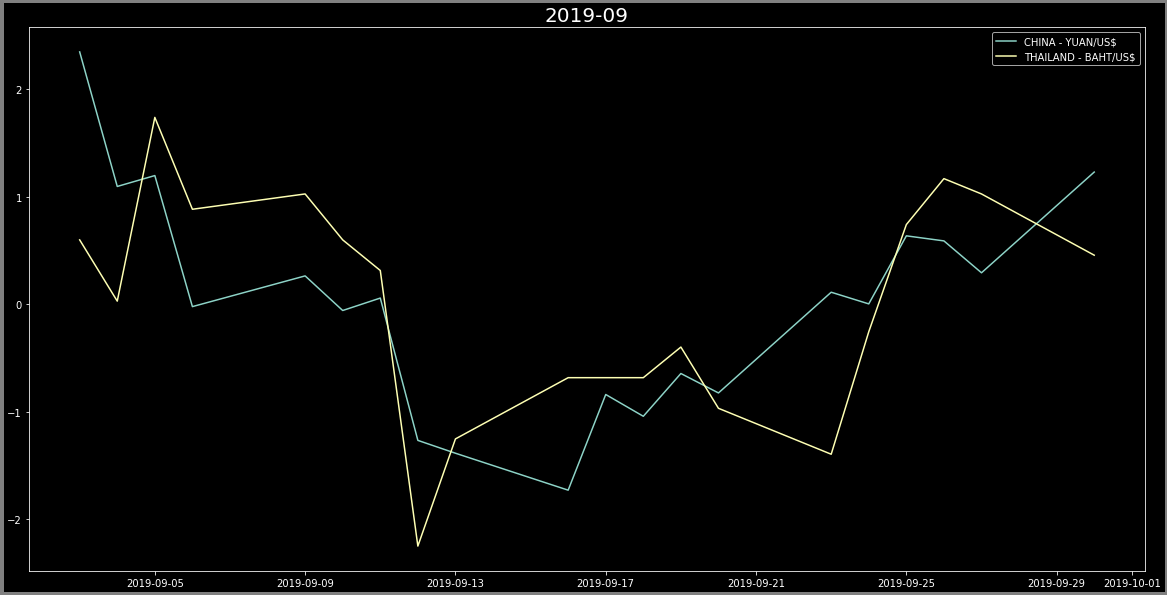

In [175]:
df2019_09 = df.loc['2019-09']
draw_plot(df2019_09, ['CHINA - YUAN/US$', 'THAILAND - BAHT/US$'], label='2019-09')

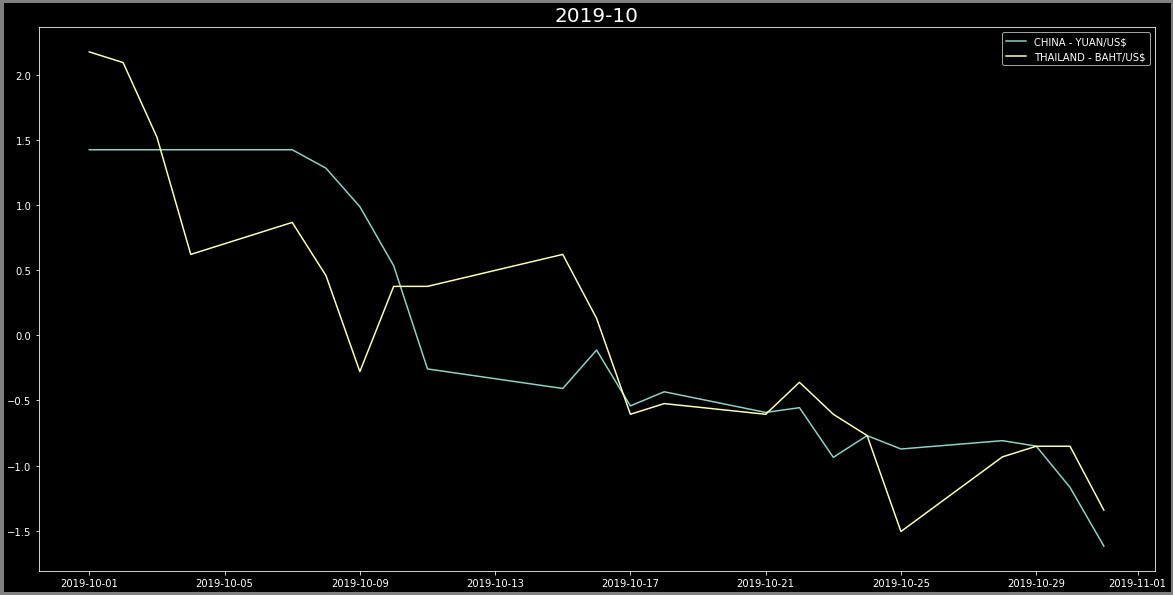

In [179]:
df2019_10 = df.loc['2019-10']
draw_plot(df2019_10, ['CHINA - YUAN/US$', 'THAILAND - BAHT/US$'], label='2019-10')

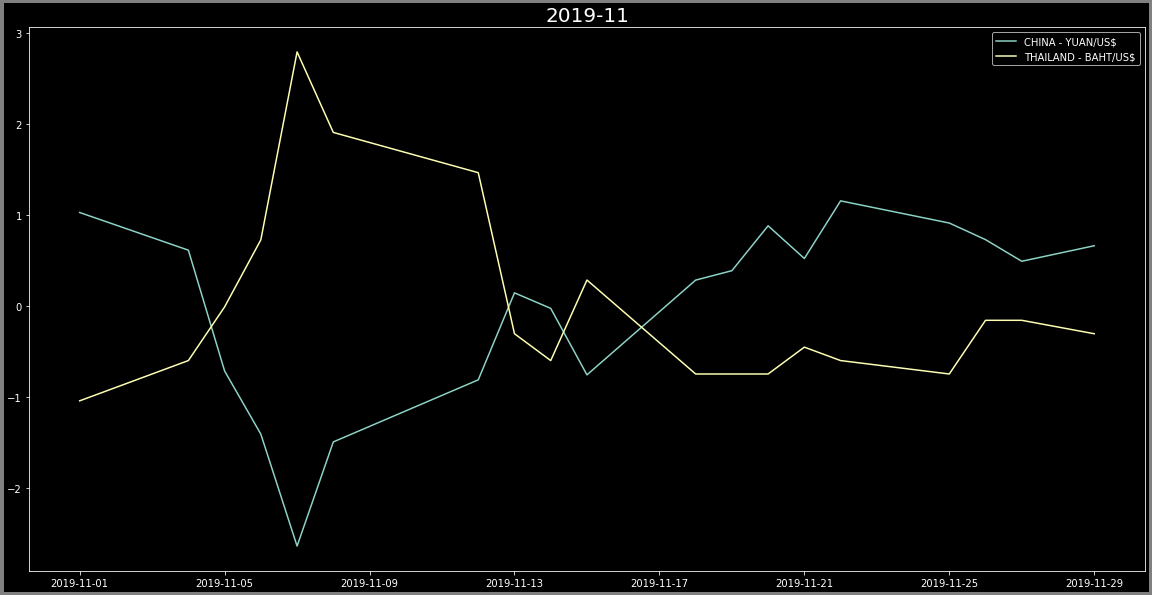

In [183]:
df2019_11 = df.loc['2019-11']
draw_plot(df2019_11, ['CHINA - YUAN/US$', 'THAILAND - BAHT/US$'], label='2019-11')

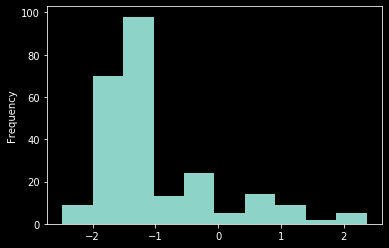

In [204]:
df2016 = df.loc['2016']
#draw_plot(df2016, ['CHINA - YUAN/US$'], label='2016')
df2019['CHINA - YUAN/US$'].plot(kind='hist')

In [191]:
corr = get_pearson(df2016)
cm = sns.light_palette("green", as_cmap=True)
corr.style.background_gradient(cmap=cm)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
AUSTRALIA - AUSTRALIAN DOLLAR/US$,1,0.369061,0.770054,-0.373643,0.752417,0.75614,-0.0638505,0.739903,0.608345,0.821989,0.0624877,0.764261,0.671994,0.396769,0.705581,0.524825,0.751331,0.0892622,-0.299356,0.571102,0.818159,0.835788
EURO AREA - EURO/US$,0.369061,1,0.0866229,0.551088,0.035636,0.531616,0.776285,0.0841892,0.603513,0.408116,0.675368,-0.101229,0.838626,0.998365,0.508145,0.882141,0.644854,0.886539,0.484544,0.921639,0.064849,0.600191
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0.770054,0.0866229,1,-0.652509,0.915953,0.593959,-0.481171,0.669646,0.3246,0.819834,-0.391916,0.874472,0.449355,0.122901,0.799482,0.158034,0.607274,-0.263331,-0.46497,0.32554,0.93234,0.701393
UNITED KINGDOM - UNITED KINGDOM POUND/US$,-0.373643,0.551088,-0.652509,1,-0.703025,-0.00989332,0.875171,-0.386536,0.129171,-0.388577,0.728317,-0.755808,0.227939,0.525214,-0.339519,0.42994,-0.104776,0.819503,0.659649,0.328832,-0.690768,-0.199007
BRAZIL - REAL/US$,0.752417,0.035636,0.915953,-0.703025,1,0.638269,-0.515445,0.69203,0.342498,0.790425,-0.396185,0.876202,0.428096,0.0800907,0.763037,0.166819,0.613653,-0.284841,-0.591413,0.258387,0.930556,0.658106
CANADA - CANADIAN DOLLAR/US$,0.75614,0.531616,0.593959,-0.00989332,0.638269,1,0.140955,0.652585,0.522552,0.61024,0.168881,0.508643,0.785919,0.569697,0.631204,0.660338,0.779781,0.381448,-0.260021,0.650774,0.587723,0.688856
CHINA - YUAN/US$,-0.0638505,0.776285,-0.481171,0.875171,-0.515445,0.140955,1,-0.22521,0.38667,-0.105101,0.900122,-0.582599,0.502324,0.751549,-0.0239956,0.70402,0.145924,0.935249,0.745108,0.593127,-0.48174,0.126789
HONG KONG - HONG KONG DOLLAR/US$,0.739903,0.0841892,0.669646,-0.386536,0.69203,0.652585,-0.22521,1,0.479829,0.584514,-0.0851336,0.679068,0.41116,0.117409,0.501599,0.232001,0.472111,-0.0788804,-0.464035,0.316794,0.702443,0.512233
INDIA - INDIAN RUPEE/US$,0.608345,0.603513,0.3246,0.129171,0.342498,0.522552,0.38667,0.479829,1,0.643964,0.500716,0.256656,0.626765,0.615614,0.452264,0.61161,0.619103,0.489109,0.0872154,0.645623,0.400705,0.5648
KOREA - WON/US$,0.821989,0.408116,0.819834,-0.388577,0.790425,0.61024,-0.105101,0.584514,0.643964,1,-0.0179804,0.721009,0.671216,0.434986,0.825254,0.469036,0.719406,0.101952,-0.167112,0.558046,0.859718,0.844281


In [192]:
corr.sort_values(by=['CHINA - YUAN/US$']).style.background_gradient(cmap=cm)

,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
SOUTH AFRICA - RAND/US$,0.764261,-0.101229,0.874472,-0.755808,0.876202,0.508643,-0.582599,0.679068,0.256656,0.721009,-0.454521,1,0.2544,-0.0657445,0.590655,0.0227977,0.53404,-0.411877,-0.607173,0.144957,0.920521,0.592498
BRAZIL - REAL/US$,0.752417,0.035636,0.915953,-0.703025,1,0.638269,-0.515445,0.69203,0.342498,0.790425,-0.396185,0.876202,0.428096,0.0800907,0.763037,0.166819,0.613653,-0.284841,-0.591413,0.258387,0.930556,0.658106
TAIWAN - NEW TAIWAN DOLLAR/US$,0.818159,0.064849,0.93234,-0.690768,0.930556,0.587723,-0.48174,0.702443,0.400705,0.859718,-0.389665,0.920521,0.414405,0.101302,0.743685,0.140651,0.652068,-0.288174,-0.541985,0.29555,1,0.714136
NEW ZEALAND - NEW ZELAND DOLLAR/US$,0.770054,0.0866229,1,-0.652509,0.915953,0.593959,-0.481171,0.669646,0.3246,0.819834,-0.391916,0.874472,0.449355,0.122901,0.799482,0.158034,0.607274,-0.263331,-0.46497,0.32554,0.93234,0.701393
HONG KONG - HONG KONG DOLLAR/US$,0.739903,0.0841892,0.669646,-0.386536,0.69203,0.652585,-0.22521,1,0.479829,0.584514,-0.0851336,0.679068,0.41116,0.117409,0.501599,0.232001,0.472111,-0.0788804,-0.464035,0.316794,0.702443,0.512233
KOREA - WON/US$,0.821989,0.408116,0.819834,-0.388577,0.790425,0.61024,-0.105101,0.584514,0.643964,1,-0.0179804,0.721009,0.671216,0.434986,0.825254,0.469036,0.719406,0.101952,-0.167112,0.558046,0.859718,0.844281
AUSTRALIA - AUSTRALIAN DOLLAR/US$,1,0.369061,0.770054,-0.373643,0.752417,0.75614,-0.0638505,0.739903,0.608345,0.821989,0.0624877,0.764261,0.671994,0.396769,0.705581,0.524825,0.751331,0.0892622,-0.299356,0.571102,0.818159,0.835788
JAPAN - YEN/US$,0.705581,0.508145,0.799482,-0.339519,0.763037,0.631204,-0.0239956,0.501599,0.452264,0.825254,-0.00802703,0.590655,0.758418,0.535727,1,0.535187,0.70872,0.170417,-0.0706347,0.664167,0.743685,0.829532
THAILAND - BAHT/US$,0.835788,0.600191,0.701393,-0.199007,0.658106,0.688856,0.126789,0.512233,0.5648,0.844281,0.156916,0.592498,0.805888,0.617559,0.829532,0.671718,0.760796,0.297287,0.0155754,0.719124,0.714136,1
CANADA - CANADIAN DOLLAR/US$,0.75614,0.531616,0.593959,-0.00989332,0.638269,1,0.140955,0.652585,0.522552,0.61024,0.168881,0.508643,0.785919,0.569697,0.631204,0.660338,0.779781,0.381448,-0.260021,0.650774,0.587723,0.688856
